In [1]:
# The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. 
# Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

# Step 1:  importing required libraries and loading dataset

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from matplotlib import pyplot as plt

df=pd.read_excel("untouched_top_40_correlated_variables_with_is_bankrupt.xlsx")
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 41 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Is_Bankrupt                                         6819 non-null   int64  
 1   Debt ratio %                                        6819 non-null   float64
 2   Current Liability to Assets                         6819 non-null   float64
 3   Borrowing dependency                                6819 non-null   float64
 4   Current Liability to Current Assets                 6819 non-null   float64
 5   Liability-Assets Flag                               6819 non-null   int64  
 6   Total expense/Assets                                6819 non-null   float64
 7   Equity to Long-term Liability                       6819 non-null   float64
 8   Cash/Current Liability                              6819 non-null   float64
 9

Is_Bankrupt                                           0
Debt ratio %                                          0
Current Liability to Assets                           0
Borrowing dependency                                  0
Current Liability to Current Assets                   0
Liability-Assets Flag                                 0
Total expense/Assets                                  0
Equity to Long-term Liability                         0
Cash/Current Liability                                0
Inventory and accounts receivable/Net value           0
Fixed Assets Turnover Frequency                       0
Contingent liabilities/Net worth                      0
Fixed Assets to Assets                                0
Net Value Growth Rate                                 0
Revenue per person                                    0
Total assets to GNP price                             0
Quick Asset Turnover Rate                             0
Quick Ratio                                     

Current Liability to Assets                  Debt ratio %                                   0.842583
Equity to Long-term Liability                Borrowing dependency                           0.806889
Inventory and accounts receivable/Net value  Borrowing dependency                           0.700139
Net Worth Turnover Rate (times)              Current Liability to Assets                    0.499370
Inventory and accounts receivable/Net value  Equity to Long-term Liability                  0.486097
Contingent liabilities/Net worth             Equity to Long-term Liability                  0.462858
Total income/Total expense                   Average Collection Days                        0.459146
Net Worth Turnover Rate (times)              Inventory and accounts receivable/Net value    0.453424
Inventory and accounts receivable/Net value  Current Liability to Assets                    0.452321
Contingent liabilities/Net worth             Borrowing dependency                          

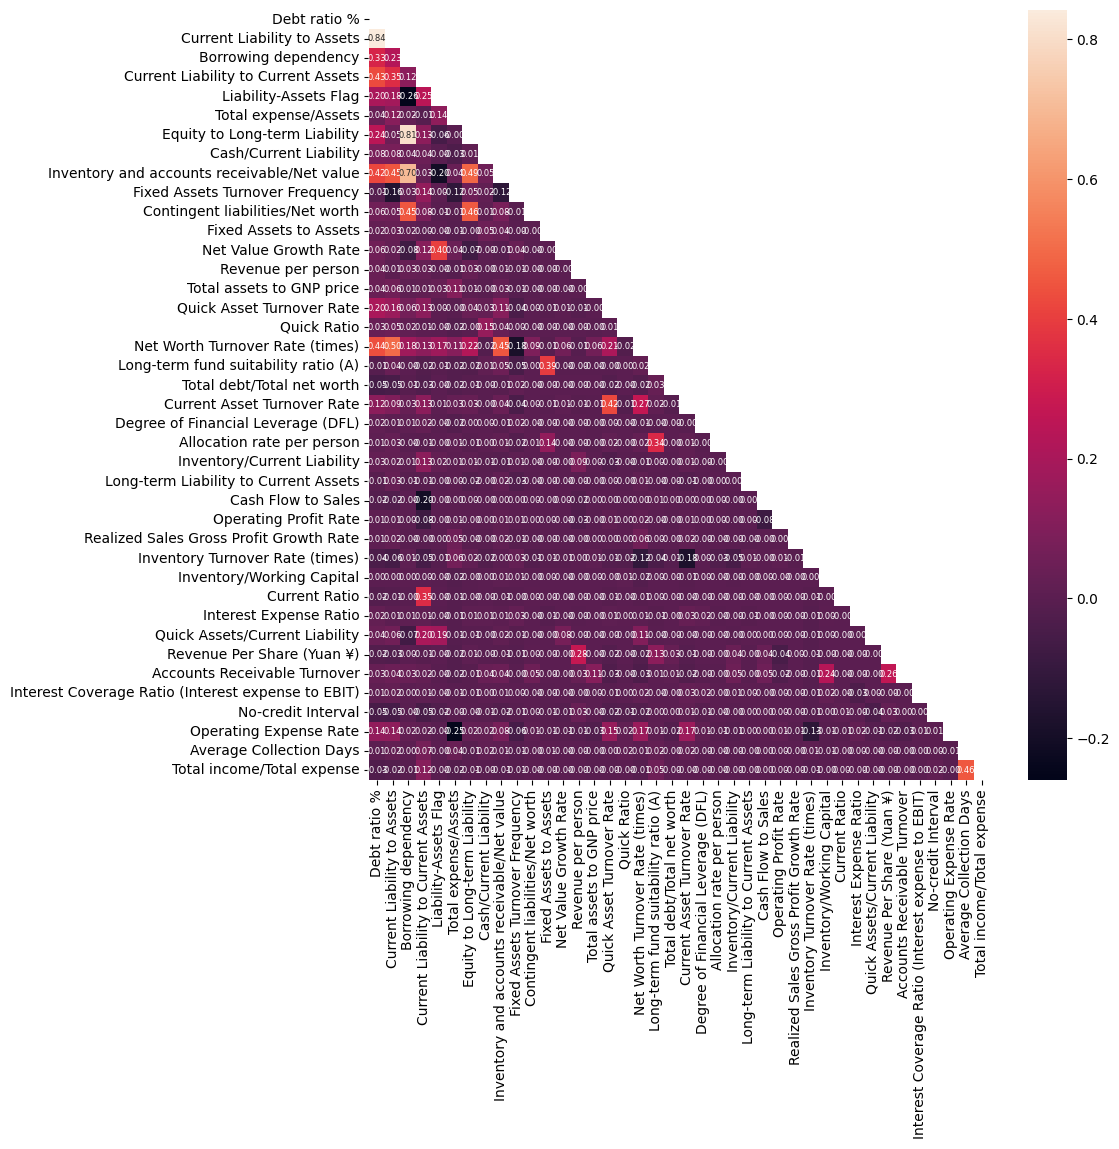

In [22]:
# Step 1: Find the correlation matrix using heatmap
import seaborn as sns

# Step 1_1: Define features (x) and target (y)
x=df.drop(columns=["Is_Bankrupt"])

y=df["Is_Bankrupt"]

corr_matrix = x.corr().abs()
upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))  # upper triangle without diagonal
top_correlations_20 = upper_tri.unstack().sort_values(ascending=False).head(20)
print(top_correlations_20)

# Step 1_2: Produce heat map of correlated features
def generate_feature_correlation_heatmap(featuredata_df):
  plt.figure(figsize=(10, 10))
  cor = x.corr()
  mask = np.triu(np.ones_like(cor)) #to have non-redundant correlations remain!
  heatmap = sns.heatmap(cor, mask=mask, annot=True, annot_kws={"fontsize": 6}, fmt=".2f") # Set fmt to ".3f" to display 3 decimals
  plt.show()

generate_feature_correlation_heatmap(df) #As the data is cleaned in advance, the correlations between features are relatively low.

In [4]:
# Step 1_3: Find the correlation matrix using Spearman method
corr_matrix = x.corr(method='spearman')

# Unstack the correlation matrix and drop self-correlations
corr_unstacked = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).unstack()

# Sort by absolute value and get top 30
top_20_corr = corr_unstacked.abs().sort_values(ascending=False).head(20)

# Display top 30 correlations
print(top_20_corr)

Current Ratio                                       Current Liability to Current Assets    0.999120
Total debt/Total net worth                          Debt ratio %                           0.992954
Quick Assets/Current Liability                      Quick Ratio                            0.975846
Average Collection Days                             Accounts Receivable Turnover           0.958928
Long-term fund suitability ratio (A)                Fixed Assets to Assets                 0.952998
Interest Coverage Ratio (Interest expense to EBIT)  Interest Expense Ratio                 0.929572
Long-term Liability to Current Assets               Equity to Long-term Liability          0.924335
Interest Coverage Ratio (Interest expense to EBIT)  Degree of Financial Leverage (DFL)     0.914954
Interest Expense Ratio                              Degree of Financial Leverage (DFL)     0.887181
Quick Assets/Current Liability                      Current Liability to Current Assets    0.885847


In [15]:
pip install imblearn

In [5]:
# Step 2: Split the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [6]:
# Step 3: defining and Fitting the RandomForestClassifier Model

# Initialize the model
rf_model=RandomForestClassifier(n_estimators=100, random_state=42) 

# Train the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Step 4: Evaluate the Model

# 4.1: Predict on test data

y_pred=rf_model.predict(x_test)

# 4.2: Calculate accuracy

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred, y_test)

print("accuracy:",accuracy) #High accuracy
print("Train accuracy:", rf_model.score(x_train, y_train))
print("Test accuracy:", rf_model.score(x_test, y_test))
print(df["Is_Bankrupt"].value_counts(normalize=True)) # Relatively high accuracy could be derived from a imbalanced dataset

accuracy: 0.9643206256109482
Train accuracy: 1.0
Test accuracy: 0.9643206256109482
Is_Bankrupt
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [14]:
#Generate Confusion Matrix and Compute Negative Predictive Value (NPV)
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel() 
npv = tn / (tn + fn)

from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))
print(f"NPV: {npv:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")

# Precision: How many predicted bankruptcies were correct?
# Recall: How many actual bankruptcies did the model catch?
# F1: Balance between precision and recall.
# Precision: How many predicted bankruptcies were correct?

              precision    recall  f1-score   support

           0     0.9651    0.9990    0.9818      1968
           1     0.7778    0.0897    0.1609        78

    accuracy                         0.9643      2046
   macro avg     0.8715    0.5444    0.5713      2046
weighted avg     0.9580    0.9643    0.9505      2046

NPV: 0.9651
Cohen's Kappa: 0.1542


In [34]:
# 5_1. Apply SMOTE to balance the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


# Train a Random Forest on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(x_train_smote, y_train_smote)

# Evaluate on the test set
y_pred_smote = model.predict(x_test)

from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred_smote)
cm_smote = confusion_matrix(y_test, y_pred_smote)

tn, fp, fn, tp = cm_smote.ravel() 
npv = tn / (tn + fn)

print("Confusion Matrix:\n", cm_smote)
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote, digits=4))
print(f"NPV: {npv:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")

Confusion Matrix:
 [[1905   63]
 [  46   32]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9764    0.9680    0.9722      1968
           1     0.3368    0.4103    0.3699        78

    accuracy                         0.9467      2046
   macro avg     0.6566    0.6891    0.6711      2046
weighted avg     0.9520    0.9467    0.9492      2046

NPV: 0.9764
Cohen's Kappa: 0.3424


In [37]:
# 6_1. Balanced report 

# Split
x_train_balanced, x_test_balanced, y_train_balanced, y_test_balanced = train_test_split(x, y, test_size=0.3, random_state=42)

model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train Random Forest with inverse class weighting
model_balanced.fit(x_train_balanced, y_train_balanced)

# Predict
y_pred_balanced = model_balanced.predict(x_test_balanced)

kappa_balanced = cohen_kappa_score(y_test_balanced, y_pred_balanced)
cm_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)

tn, fp, fn, tp = cm_balanced.ravel() 
npv_balanced = tn / (tn + fn)

# Report
print(classification_report(y_test_balanced, y_pred_balanced, digits=4))
print(f"NPV: {npv_balanced:.4f}")
print(f"Cohen's Kappa: {kappa_balanced:.4f}")

              precision    recall  f1-score   support

           0     0.9637    0.9980    0.9805      1968
           1     0.5000    0.0513    0.0930        78

    accuracy                         0.9619      2046
   macro avg     0.7318    0.5246    0.5368      2046
weighted avg     0.9460    0.9619    0.9467      2046

NPV: 0.9637
Cohen's Kappa: 0.0865


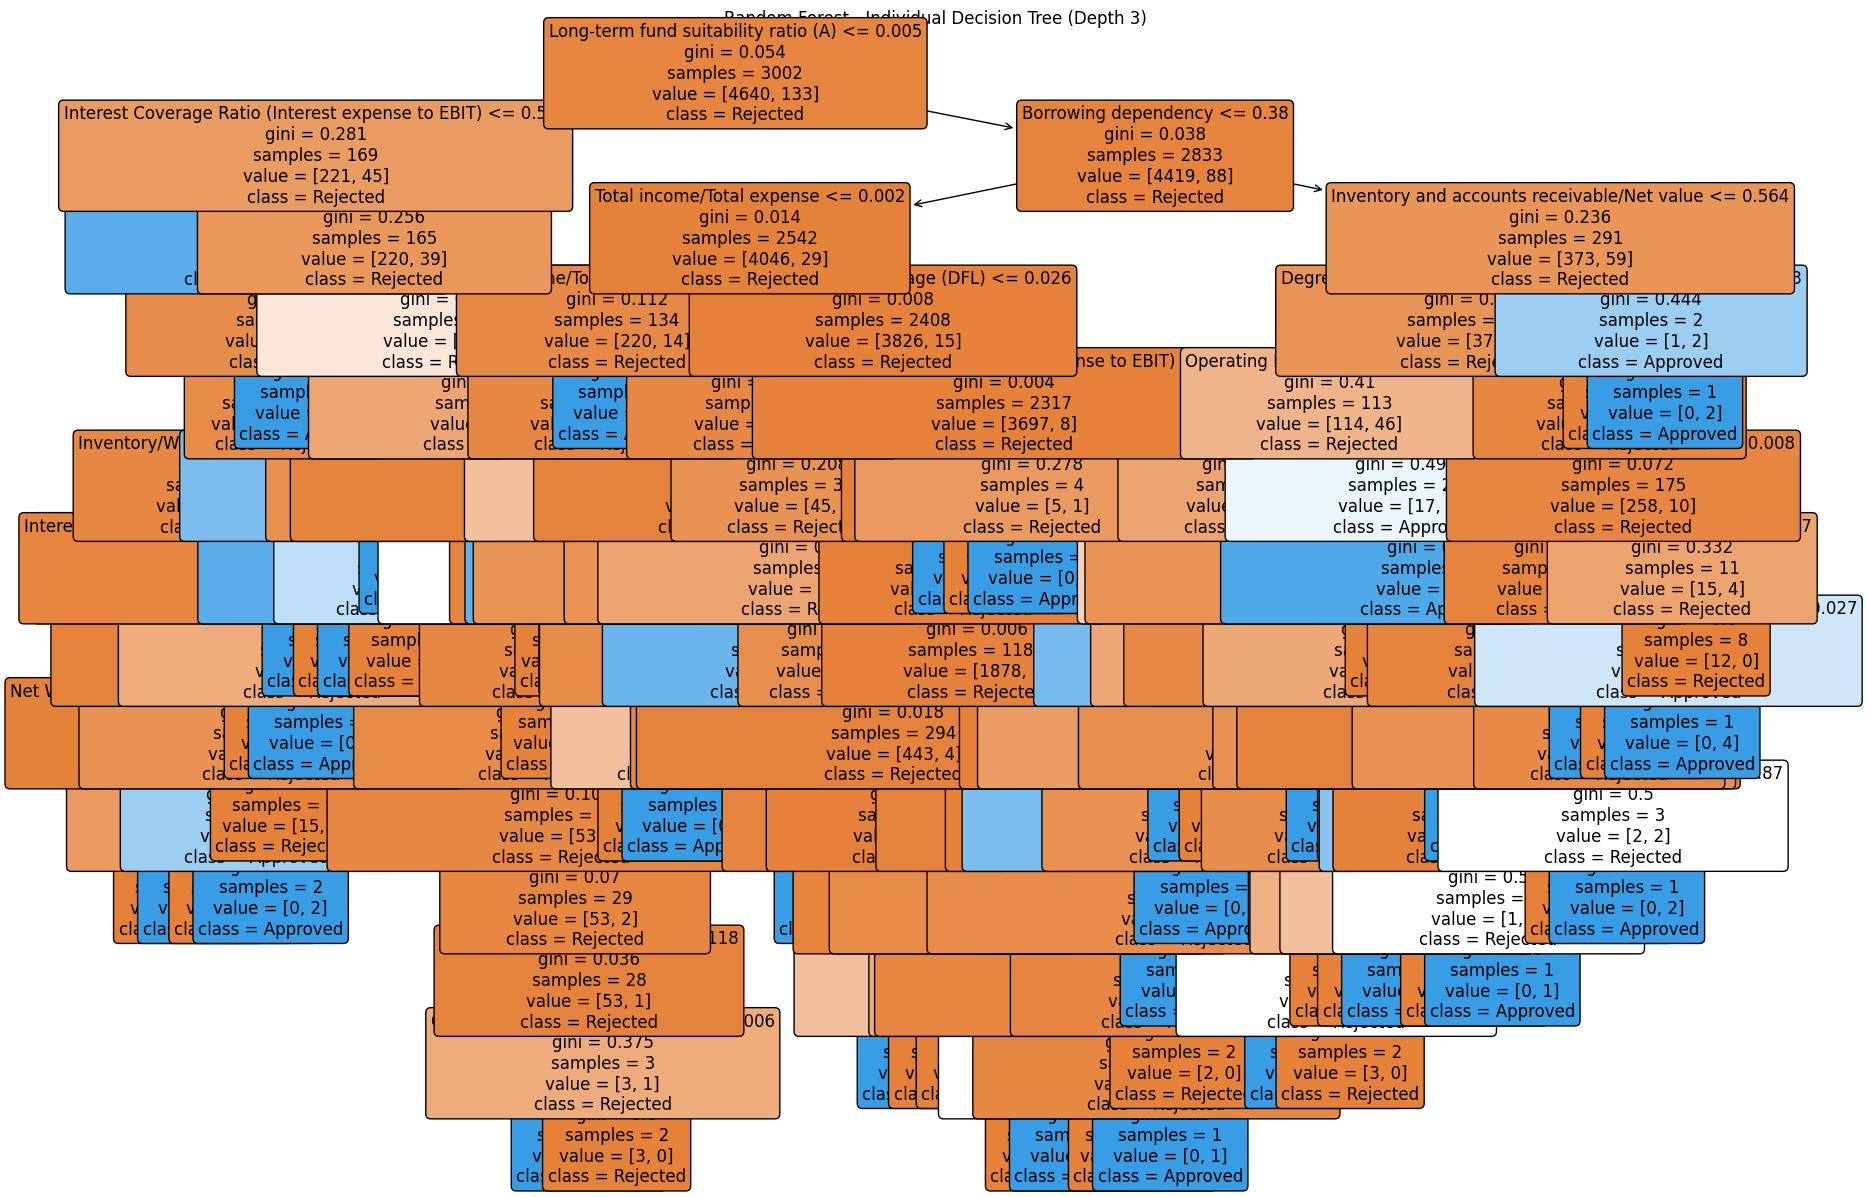

In [81]:
# Step 6: Visualizing an Individual Decision Tree (Depth 3)-Multivariate & Supervised learning
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract a single tree from the forest
estimator = rf_model.estimators_[0]

# Set the maximum depth for visualization
estimator.max_depth = 3

# Plot the tree
plt.figure(figsize=(20, 15))
plot_tree(estimator, feature_names=x.columns, class_names=["Rejected", "Approved"], filled=True, rounded=True, fontsize=12)
plt.title("Random Forest - Individual Decision Tree (Depth 3)")
plt.show()

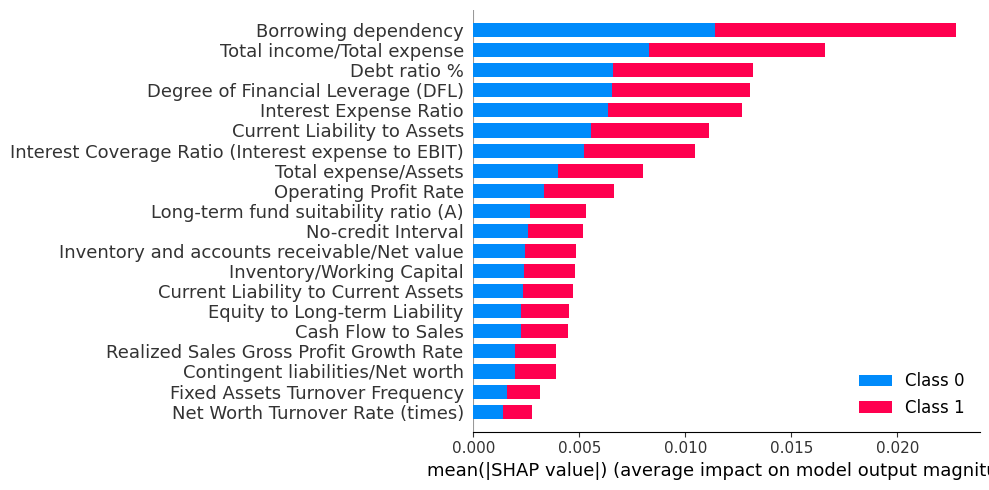

In [83]:
#pip install shap
import shap
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x, plot_size=(10, 5)) 

#Class 0 = prediction for the 'Not bankrupt' case & Class 1 = prediction for the 'Bankrupt' case

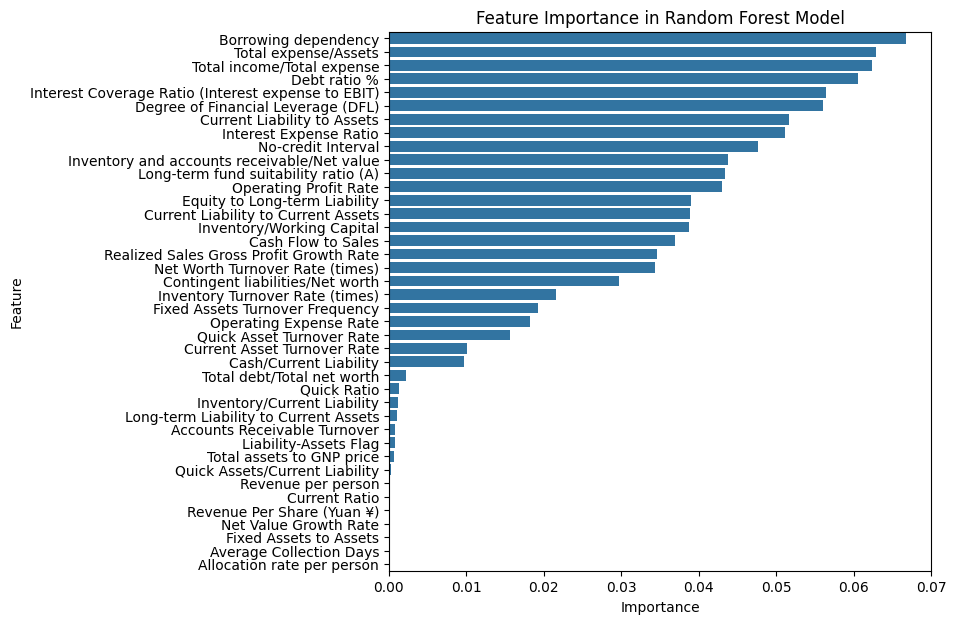

In [85]:
# Step_7: Get feature importances
import seaborn as sns
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

• How results can be interpreted?
: Try to interpret overall results using:

-Accuracy, precision, recall, F1-score – to measure performance
-Feature importance (from Random Forest) – to identify which variables influence predictions
-SHAP values – to explain how each feature pushes a prediction toward or away from bankruptcy

• How your results help to make a business decision?

-Financial institutions or investors can use the model to screen at-risk companies before offering loans or investments.
-Companies can identify operational or financial weaknesses (e.g., negative retained earnings or high debt ratios) and take corrective actions.

#https://www.aimspress.com/article/doi/10.3934/DSFE.2021010?viewType=HTML

Early warning systems can be developed using this model to avoid financial loss.
• Which model to use? Univariate or multivariate? Supervised vs. unsupervised?
Outcomes are discrete, categorical , and multivariate.  
• Which Machine learning methods will be suitable and why?
• Identify which variable(s) are really a contributors towards churn? Is it possible to identify? How?
• How all variables are correlated /or not correlated?
• How can you summarize the results using plots/graphs?
• Develop a prediction model and compare them? which model the best? How did you choose?
• Describe advantages and disadvantages